# Diabetes Prediction Model

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### 1. Installing required libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #Data Manipulation
import matplotlib.pyplot as plt #Data visualization
%matplotlib inline
import seaborn as sns #Data visualization
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
pd.options.display.max_rows=999

### 2. Reading the dataset

In [3]:
data = pd.read_csv('health care diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

#### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Blood pressure (mm Hg)
- SkinThickness: Skin fold thickness (mm)
- Insulin: Serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Number of Instances: 768

Number of Attributes: 8 plus class

For Each Attribute: (all numeric-valued)
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Blood pressure (mm Hg)
4. Skin fold thickness (mm)
5. Serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")

### 3. Exploratory Data Analysis(EDA)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
### Let's ceck for balance dataset by analysing the count of outcomes

data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [8]:
data['Outcome'].value_counts()/len(data)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

It is a balanced dataset with 65% non diabetic and 35% are diabetic
Let's visualize the outcome using countplot.

Text(0.5, 1.0, 'Diabetic Patient Vs Non-Diabetic Patient')

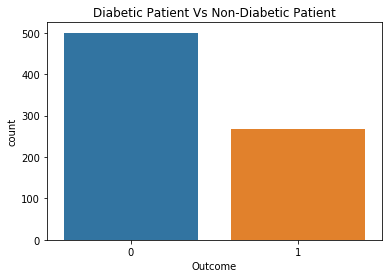

In [9]:
sns.countplot('Outcome', data=data)
plt.title('Diabetic Patient Vs Non-Diabetic Patient')

In [10]:
### Missing Value analysis
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There is no missing values.
The dataset does not have any missing values but few columns have zero value as skin thickness cannot be zero so is insulin
Replacing zero value with NaN to undersand missing value.


In [11]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [12]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

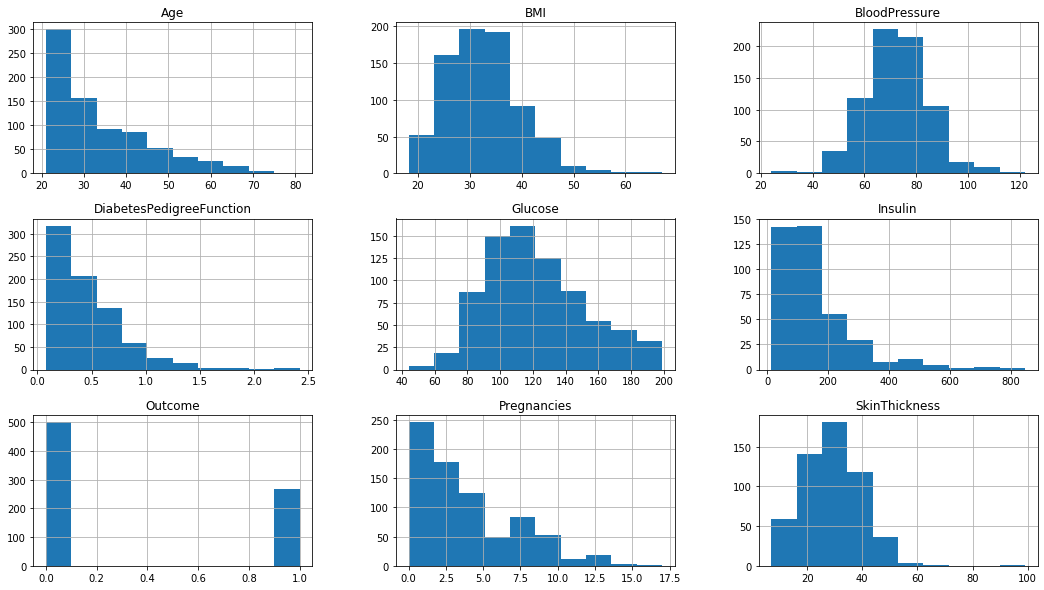

In [13]:
### Histogram plot with missing values
data.hist(figsize=(18,10,));

In [14]:
### Descriptive analysis to understand how to replace the missing values
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From the descriptive analysis we observe the standard deviation min max and quantile analysis.
Replacing Glucose with median as it has normal distribution and replacing it with mean might effect distribution.

Blood Pressure with median as it has normal distribution and replacing it with mean might effect distribution.

Skin thickness with median as it has outliers

Insulin with mean 

BMI with median

In [15]:
### Replacing NaN Values

data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
### Exporting Excel file

data.to_excel('Diabetes.xlsx')


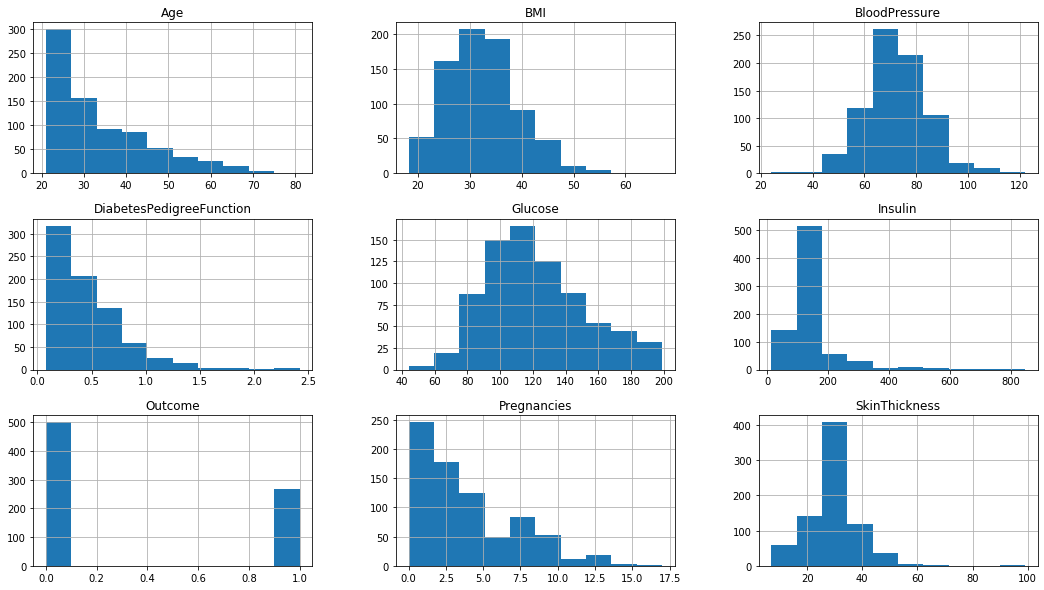

In [18]:
### Histogram plot after replacing missing value

data.hist(figsize=(18,10,));

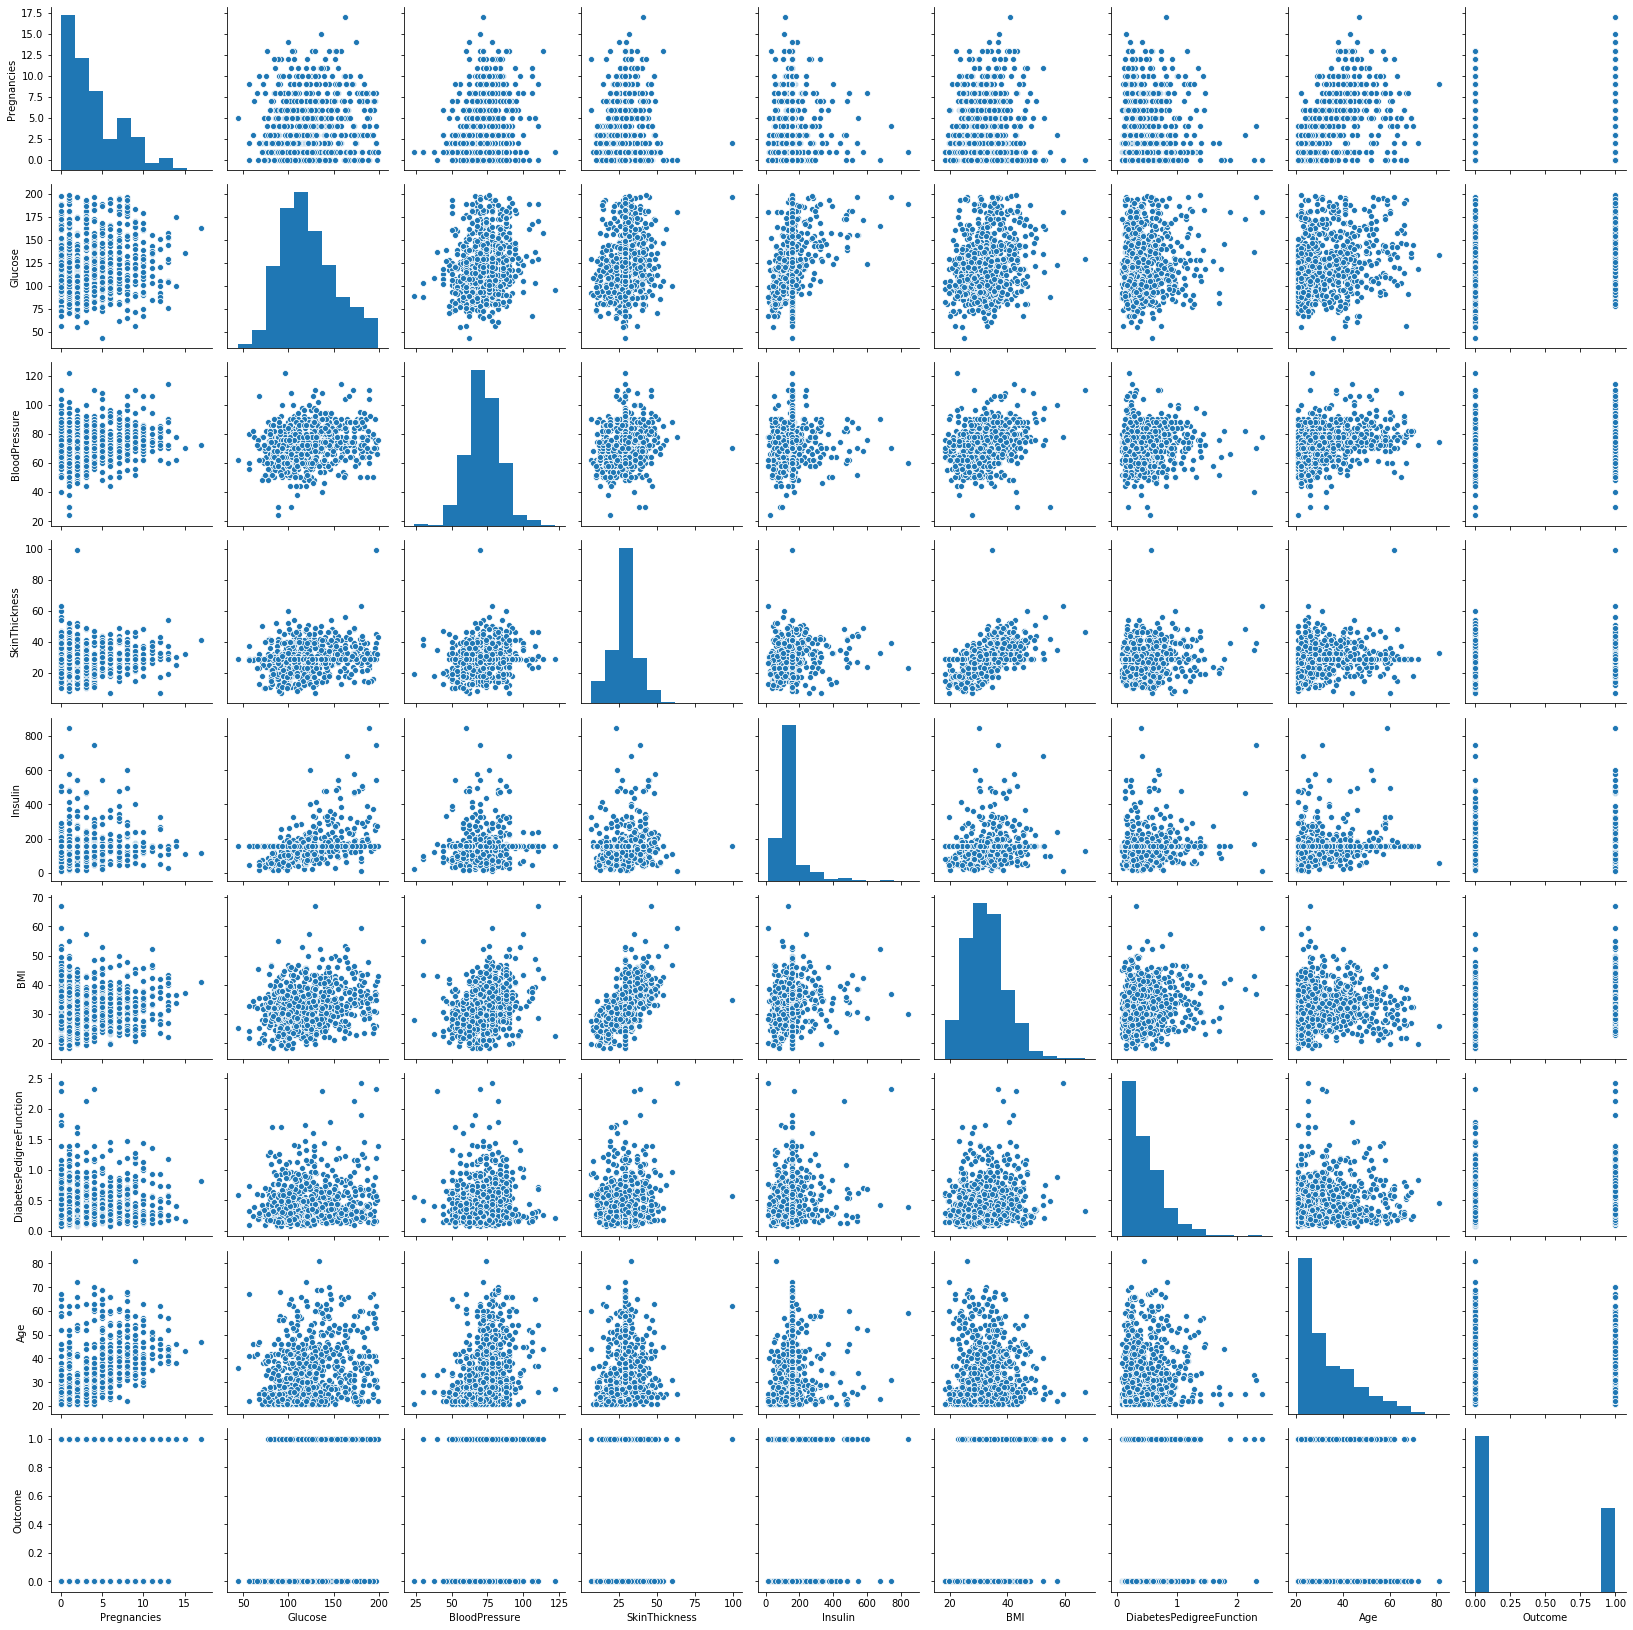

In [19]:
### Creating Scatter plot to understand relationshio between variables

sns.pairplot(data)

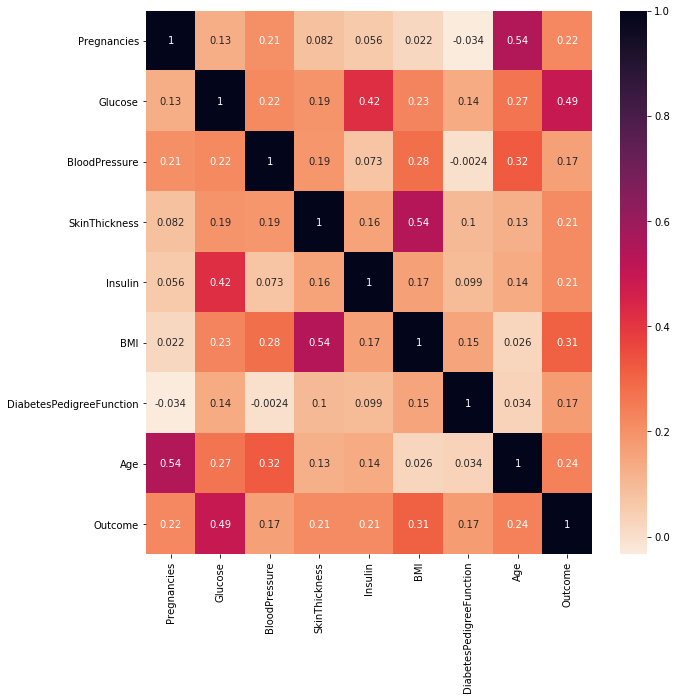

In [20]:
### Analysing correlation with heat map

plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot =True,cmap='rocket_r')

None of the features is highly correlated with outcome which makes difficult for a model to acheive high accuracy.
From the dataset glucose is most correlated with outcome.

In [21]:
### Separating independent variables and target variable

X = data.iloc[:,0:8]
y = data.iloc[:,-1]

In [22]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.0,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
### Train-Test Split of the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state= 92)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [25]:
### Feature Scaling
###Getting all the variable in same scale using StandardScaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Model Training

The problem statement is a classification problem to predict if a patient having diabetes or not, so its a binary classification problem 

There are many algortihms which can work for bianry classification problem like Logistics Regression, Decision Tree, KNN, Random Forest etc.

Applying all the algorithm and after getting the accuracy score we can conclude to which algorithm to use for solving this particular problem.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score,f1_score,recall_score,roc_auc_score

In [27]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    model_test_classification_report = classification_report(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Performance for Training Set')
    print("- Accuracy:{:.4f}".format(model_train_accuracy))
    print("- F1 score:{:.4f}".format(model_train_f1))
    print("- Precision score:{:.4f}".format(model_train_precision))
    print("- Recall score:{:.4f}".format(model_train_recall))
    print("- Roc Auc score:{:.4f}".format(model_train_rocauc_score))
    
    
    print("--------------------------------------------")
    
    print('Model Performance for Test Set')
    print("- Accuracy:{:.4f}".format(model_test_accuracy))
    print("- F1 score:{:.4f}".format(model_test_f1))
    print("- Precision score:{:.4f}".format(model_test_precision))
    print("- Recall score:{:.4f}".format(model_test_recall))
    print("- Roc Auc score:{:.4f}".format(model_test_rocauc_score))
    print("- Confusion Matrix:{}".format(model_test_confusion_matrix))
    
    
    
    print("="*35)
    print('\n')

Logistic Regression
Model Performance for Training Set
- Accuracy:0.7747
- F1 score:0.7681
- Precision score:0.7237
- Recall score:0.5820
- Roc Auc score:0.7307
--------------------------------------------
Model Performance for Test Set
- Accuracy:0.7706
- F1 score:0.7577
- Precision score:0.7407
- Recall score:0.5063
- Roc Auc score:0.7071
- Confusion Matrix:[[138  14]
 [ 39  40]]


Decision Tree
Model Performance for Training Set
- Accuracy:1.0000
- F1 score:1.0000
- Precision score:1.0000
- Recall score:1.0000
- Roc Auc score:1.0000
--------------------------------------------
Model Performance for Test Set
- Accuracy:0.7229
- F1 score:0.7191
- Precision score:0.6056
- Recall score:0.5443
- Roc Auc score:0.6800
- Confusion Matrix:[[124  28]
 [ 36  43]]


KNN
Model Performance for Training Set
- Accuracy:0.8287
- F1 score:0.8285
- Precision score:0.7594
- Recall score:0.7513
- Roc Auc score:0.8110
--------------------------------------------
Model Performance for Test Set
- Accuracy:

In [28]:
### Hyperparameter Training
rf_params = {'max_depth': [5, 8, 15, None, 10],
             'max_features':[5, 7, 'auto', 8],
             'min_samples_split':[2, 8, 15, 20],
             'n_estimators': [100, 200, 500, 1000]}

knn_params = {'n_neighbors': [5, 8, 10, 15],
             'leaf_size': [30, 20, 40, 50]}

Gradient_boosting_params = {'max_depth': [5, 8, 15, None, 10],
             'max_features':[5, 7, 'auto', 8],
             'min_samples_split':[2, 8, 15, 20],
             'n_estimators': [100, 200, 500, 1000],
              'verbose': [0, 5, 10, 8]}




In [29]:
# Model List for Hyperparameter tuning

randomcv_models= [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("KNN", KNeighborsClassifier(), knn_params),
                   ("Gradient_boosting",GradientBoostingClassifier(),Gradient_boosting_params )
]

In [30]:
randomcv_models

[('RF',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'),
  {'n_neighbors': [5, 8, 10, 15], 'leaf_size': [30, 20, 40, 50]})

In [31]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                 param_distributions=params,
                                 n_iter=100,
                                 cv=3, 
                                 verbose=2,
                                 n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f'------------- Best Params for {model_name} -------------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


      Iter       Train Loss   Remaining Time 
         1           1.1831            0.79s
         2           1.0957            0.78s
         3           1.0204            0.81s
         4           0.9461            0.82s
         5           0.8747            0.84s
         6           0.8252            0.81s
         7           0.7799            0.80s
         8           0.7332            0.79s
         9           0.6942            0.78s
        10           0.6555            0.77s
        11           0.6219            0.77s
        12           0.5891            0.76s
        13           0.5640            0.74s
        14           0.5402            0.73s
        15           0.5124            0.72s
        16           0.4912            0.71s
        17           0.4726            0.70s
        18           0.4532            0.69s
        19           0.4389            0.68s
        20           0.4164            0.67s
        21           0.3982            0.66s
        2

In [32]:
## Final Model training
models={
    "KNN":KNeighborsClassifier(n_neighbors = 10, leaf_size = 30),
    "Random Forest":RandomForestClassifier(n_estimators = 1000, min_samples_split = 20, max_features = 5, max_depth = None),
    "Gradient Boosting":GradientBoostingClassifier(verbose = 10, n_estimators = 200, min_samples_split = 2, max_features = 5, max_depth = 8)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    score=cross_val_score(model, X_train, y_train, cv = 10).mean()
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    model_test_classification_report = classification_report(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Performance for Training Set')
    print("- Accuracy:{:.4f}".format(model_train_accuracy))
    print("- F1 score:{:.4f}".format(model_train_f1))
    print("- Precision score:{:.4f}".format(model_train_precision))
    print("- Recall score:{:.4f}".format(model_train_recall))
    print("- Roc Auc score:{:.4f}".format(model_train_rocauc_score))
    
    
    
    print("--------------------------------------------")
    
    print('Model Performance for Test Set')
    print("- Accuracy:{:.4f}".format(model_test_accuracy))
    print("- F1 score:{:.4f}".format(model_test_f1))
    print("- Precision score:{:.4f}".format(model_test_precision))
    print("- Recall score:{:.4f}".format(model_test_recall))
    print("- Roc Auc score:{:.4f}".format(model_test_rocauc_score))
    print("- Confusion Matrix:{}".format(model_test_confusion_matrix))
    print('- Final_Score:{:.4f}'.format(score))
    
    
    
    print("="*35)
    print('\n')

KNN
Model Performance for Training Set
- Accuracy:0.8007
- F1 score:0.7968
- Precision score:0.7531
- Recall score:0.6455
- Roc Auc score:0.7653
--------------------------------------------
Model Performance for Test Set
- Accuracy:0.7316
- F1 score:0.7157
- Precision score:0.6604
- Recall score:0.4430
- Roc Auc score:0.6623
- Confusion Matrix:[[134  18]
 [ 44  35]]
- Final_Score:0.7539


Random Forest
Model Performance for Training Set
- Accuracy:0.9106
- F1 score:0.9103
- Precision score:0.8852
- Recall score:0.8571
- Roc Auc score:0.8984
--------------------------------------------
Model Performance for Test Set
- Accuracy:0.7359
- F1 score:0.7328
- Precision score:0.6250
- Recall score:0.5696
- Roc Auc score:0.6960
- Confusion Matrix:[[125  27]
 [ 34  45]]
- Final_Score:0.7669


      Iter       Train Loss   Remaining Time 
         1           1.1616            1.79s
         2           1.0349            2.38s
         3           0.9323            2.56s
         4           0.84

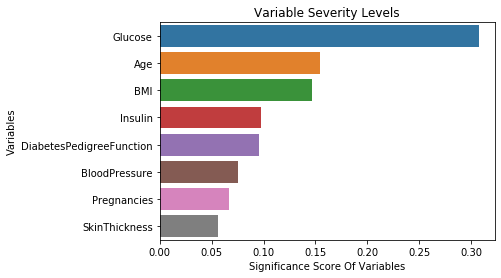

In [33]:
feature_imp = pd.Series(model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### Conclusion

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1. Diabetes Data Set read.

2. With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3. During Model Building; Logistic Regression, KNN, SVM, Random Forests, Decision Tree, Gradient Boosting like using machine learning models Cross Validation Score were calculated. Later Random Forests, Gradient Boosting, KNN hyperparameter optimizations optimized to increase Cross Validation value.

4. Result: The model created as a result of Random Forest Classifier hyperparameter optimization became the model with the highest Cross Validation Score value. (0.76) but model overfitting is a concern, so KNN is better with Score value. (0.75). 